### **[RUBRIC FEEDBACK]**

**[Algemeen]:** Je was de URL naar je github vergeten op Canvas, dit is verplicht. Vergeet niet alle cells uit te voeren voor je het inlevert, sommige cells zijn niet uitgevoerd en daardoor zie je geen output.

**[Visualisaties] (__Op Niveau__):** De visualisaties zijn mooi en netjes. Ook zijn er goede grafiektypen gekozen voor de data die je wilt laten zien. De conclusie van de grafieken is ook grootendeels juist

**[Data preparatie] (__Onder Niveau__)** De data preparatie is nauwelijks aanwezig, er wordt alleen kort gekeken naar missende waardes, maar hier wordt vervolgens niets mee gedaan. Dit heeft ook geleid tot onbruikbare visualisaties en conclusies. Het is cruciaal om de data goed te verkennen en voor te bereiden voordat je gaat visualiseren, anders kan je verkeerde conclusies trekken.

**[Gebruikte technieken] (__Op Niveau__)** Voor dit niveau zijn de gebruikte technieken goed, er is gebruik gemaakt van pandas en matplotlib/seaborn om te visualiseren en de pandas functies zijn goed gebruikt.

---

#### **[FEEDBACK]**

Hele nette titel en introductie met een duidelijke punten die je wilt gaan onderzoeken, netjes!

---

# Onderzoek naar Airbnb in Amsterdam

## Inleiding
Airbnb is wereldwijd een van de bekendste platforms voor het boeken van verblijf. Het wordt veel gebruikt door toeristen, maar ook door vastgoedverhuurders die hun eigendommen via het platform aanbieden. Mijn persoonlijke interesse ligt vooral bij die laatste groep: de verhuurders. Stel dat ik de loterij win. Waar zou ik dan het beste in kunnen investeren, en wat doen mijn concurrenten? Voor welke prijs bieden zij bepaalde accommodaties aan, en in welke buurten is het aanbod het grootst? Om hier een beter beeld van te krijgen, ga ik kijken naar twee aspecten van de Airbnb-markt in Amsterdam:

1. **Gemiddelde prijs per kamertype**
   - Ik wil weten welk type accommodatie gemiddeld het meeste oplevert. Dit laat ik zien met een staafdiagram waarin de gemiddelde prijs per kamertype wordt weergegeven.

2. **Aantal accommodaties per buurt**
   - We bekijken hoe het aanbod verdeeld is over de stad. Sommige buurten hebben veel Airbnb’s, andere juist weinig. Dit laat ik zien met een staafdiagram dat het aantal accommodaties per buurt toont.


In [1]:
# inladen van packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

# Inladen van data
airbnb = pd.read_csv("https://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2025-06-09/data/listings.csv.gz")

## Datapreparatie

In [2]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10168 entries, 0 to 10167
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10168 non-null  int64  
 1   listing_url                                   10168 non-null  object 
 2   scrape_id                                     10168 non-null  int64  
 3   last_scraped                                  10168 non-null  object 
 4   source                                        10168 non-null  object 
 5   name                                          10168 non-null  object 
 6   description                                   9859 non-null   object 
 7   neighborhood_overview                         5258 non-null   object 
 8   picture_url                                   10168 non-null  object 
 9   host_id                                       10168 non-null 

In [3]:
airbnb.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               970
Length: 79, dtype: int64

#### **[FEEDBACK]**

Goed dat je een aparte kolom maakt voor de numerieke prijs. 

Los daarvan adviseer ik om uit te kijken met over meerdere cells een dataframe aan te passen, aangezien je later mogelijk nog iets wilt analyseren wat nu verwijderd is. Maak in plaats daarvan een kopie van het dataframe en pas daar de wijzigingen op toe. Dit kan ook tot problemen leiden als je een cel opnieuw wilt uitvoeren, maar de cellen erna niet of vice versa. 

Over het algemeen heb je een nette datapreparatie gedaan, maaar je mist wel het verkennen en evt. verwijderen van outliers. Dit is echt een cruciale stap in de datapreparatie, aangezien outliers je analyses en visualisaties flink kunnen beïnvloeden. Ook mag er iets meer toelichting gegeven worden aan de stappen die ondernomen zijn.

---

Om de visualisaties uit te voeren, is het belangrijk om de data voor te bereiden:
- **Data opschonen**: We zullen controleren op ontbrekende waarden en deze waar nodig verwijderen in de kolommen voor prijs. Ook zal ik een nieuwe kolom maken waar de prijs een float is, zodat we operaties kunnen uitvoeren als mean voor het gemiddelde bijvoorbeeld.

In [5]:
# Nieuwe kolom met prijs als een float
airbnb['price_numeric'] = airbnb['price'].str.replace('$','').str.replace(',','').astype(float)

**[Feedback TJM]** Groepeer de datapreparatie bij de vraag die je aan het beantwoorden bent: het verwijderen van deze `null`s hoort dus bij visualisatie 2 onderaan dit notebook.

In [6]:
# Verwijderen van rijen met ontbrekende waarden in prijs
airbnb = airbnb.dropna(subset=['price_numeric'])

- **Groeperen en Aggregeren**: Hier groeperen we de data per room type en berekenen we de gemiddelde prijs. We tellen ook het aantal accommodaties per buurt. Zodat we kunnen zien welk type accommodatie het meeste oplevert, het aantal accommodaties per buurt te tellen, krijgen we inzicht in waar het aanbod het grootst is.

In [17]:
# Gemiddelde prijs per room_type
avg_price_per_room_type = airbnb.groupby('room_type')['price_numeric'].mean().reset_index()

# Het aantal accommodaties per buurt tellen
count_accommodations_per_neighbourhood = airbnb['neighbourhood_cleansed'].value_counts().reset_index()
count_accommodations_per_neighbourhood.columns = ['Buurt', 'Aantal']
count_accommodations_per_neighbourhood

,Buurt,Aantal
0,De Baarsjes - Oud-West,1039
1,Centrum-West,801
2,De Pijp - Rivierenbuurt,706
3,Centrum-Oost,629
4,Zuid,456
5,Westerpark,397
6,Oud-Oost,347
7,Oud-Noord,296
8,Bos en Lommer,278
9,Oostelijk Havengebied - Indische Buurt,256


### Visualisatie 1: Aantal Airbnb-accommodaties per buurt.
We gaan nu het aantal Airbnb-accommodaties per buurt visualiseren met een staafdiagram.

#### **[FEEDBACK]**

Mooie visualisatie met gridlines! Het enige kleine puntje wat ik heb is dat de bovenste paar bars in de kolom best wel licht zijn, waardoor ze slecht te onderscheiden zijn van de achtergrond.

---

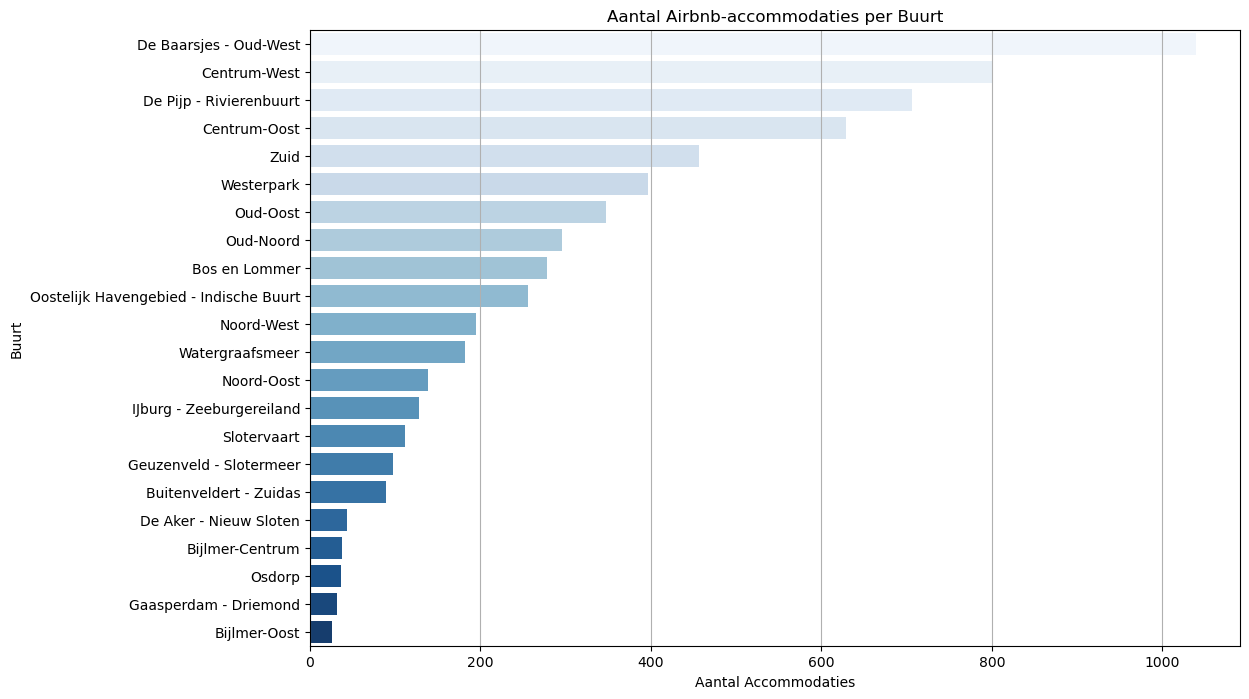

In [9]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Aantal_Accommodaties',y='Buurt',data=count_accommodations_per_neighbourhood,hue='Buurt',palette='Blues',legend=False)

plt.title('Aantal Airbnb-accommodaties per Buurt')
plt.xlabel('Aantal Accommodaties')
plt.ylabel('Buurt')
plt.grid(axis='x')
plt.show()

#### **[FEEDBACK]**

Nette en uitgebreide conclusie over de grafiek waarbij je de belangrijkste punten benoemt en mogelijk nadenkt over het gebruik van de data. Goed gedaan!

---

#### Conclusie 1

We hebben gekeken waar de meeste accommodaties liggen en hoe het aanbod verschilt per buurt. Er is een groot verschil tussen de buurten met veel accommodaties en die met weinig. Sommige buurten hebben dus veel meer aanbod dan andere. Wat mij opviel, is De Baarsjes. Ik had verwacht dat er vooral veel accommodaties zouden zijn in het centrum, omdat daar veel toeristen komen. Maar De Baarsjes heeft verrassend veel aanbod. Misschien kiezen toeristen steeds vaker voor buurten net buiten het centrum, zoals De Baarsjes. Deze informatie is handig als je wilt weten waar nog kansen liggen, bijvoorbeeld voor nieuwe accommodaties.

### Visualisatie 2: Gemiddelde Prijs per Room Type
We gaan nu de gemiddelde prijs per room type visualiseren met een staafdiagram.

#### **[FEEDBACK]**

In deze visualisatie is het te zien dat de outliers niet zijn verwijderd in een eerder stadium; de gemiddelde prijs van een hotelkamer is waarschijnlijk niet €12.000+ per nacht. Dit beïnvloedt de visualisatie en maakt het moeilijker om de verschillen tussen de andere kamertypes te zien. Het is belangrijk om outliers te verwijderen of een andere maat zoals de mediaan te gebruiken om een beter beeld te krijgen van de gemiddelde prijzen. Als je een grafiek maakt, ga dan altijd na of de data die op de grafiek te zien is wel echt kan kloppen. 


Wel goed dat de assen voorzien zijn van labels (inclusief valuta's), gridlines en een titel, dit maakt de grafiek duidelijker.

---

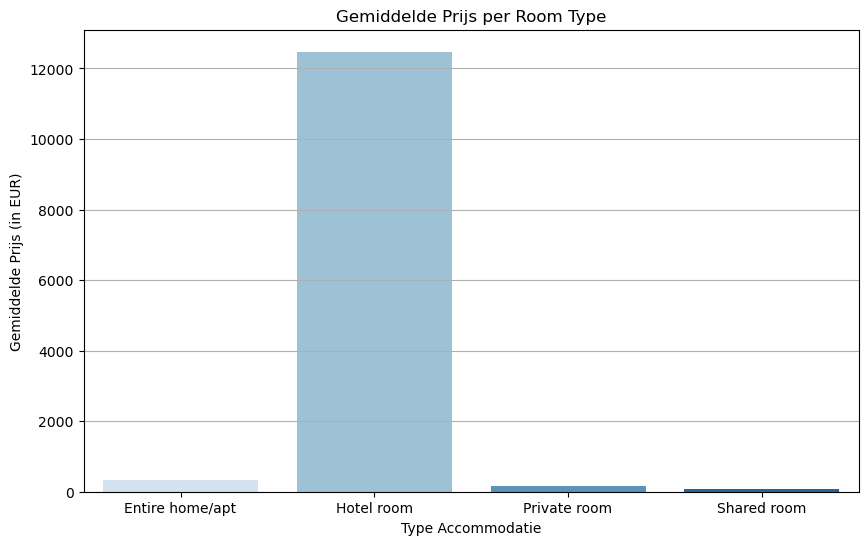

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price_numeric', data=avg_price_per_room_type, hue='room_type', palette='Blues', legend=False)
plt.title('Gemiddelde Prijs per Room Type')
plt.xlabel('Type Accommodatie')
plt.ylabel('Gemiddelde Prijs (in EUR)')
plt.grid(axis='y')
plt.savefig(fname='avg_price_per_room_type1.png')
plt.show()

#### **[FEEDBACK]**

Door de vertekende data is het lastig om een conclusie te trekken uit de grafiek. Zo kan er niets nuttigs gezegd worden over de verschillen tussen de kamertypes, omdat de data niet klopt.

---

**[Feedback TJM]** Hier wat toevoegingen van mijn hand om het verschil te tonen.

count     6321.000000
mean       364.922164
std       2288.990696
min          8.000000
25%        162.000000
50%        223.000000
75%        315.000000
max      80018.000000
Name: price_numeric, dtype: float64

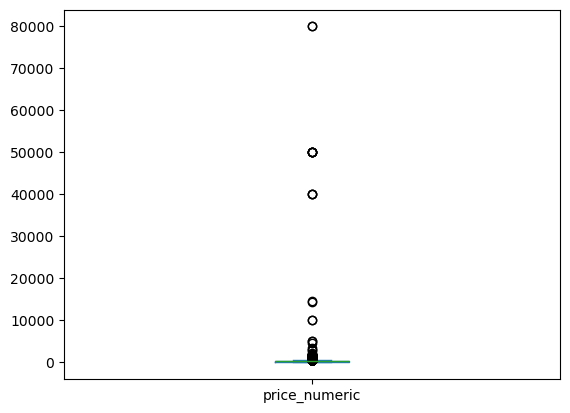

In [11]:
# Gemiddelde prijs per room_type
airbnb['price_numeric'].plot.box()
airbnb['price_numeric'].describe()

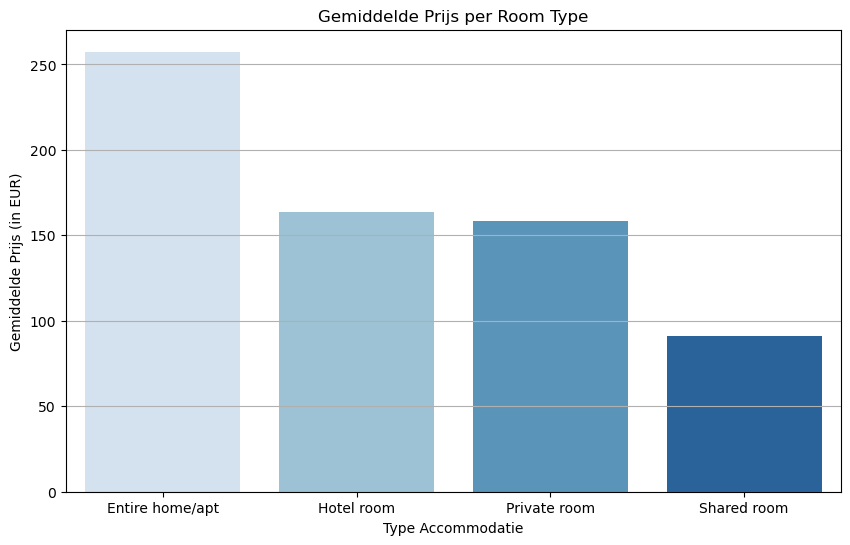

In [16]:
iqr = 315 - 162
lim_min = 162 - 1.5 * iqr
lim_max = 315 + 1.5 * iqr

airbnb_ = airbnb[airbnb['price_numeric'] <= lim_max]

avg_price_per_room_type_ = airbnb_.groupby('room_type')['price_numeric'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price_numeric', data=avg_price_per_room_type_, hue='room_type', palette='Blues', legend=False)
plt.title('Gemiddelde Prijs per Room Type')
plt.xlabel('Type Accommodatie')
plt.ylabel('Gemiddelde Prijs (in EUR)')
plt.grid(axis='y')
plt.savefig(fname='avg_price_per_room_type2.png')
plt.show()

#### Conclusie 2

We hebben onderzocht wat de gemiddelde prijs is per type accommodatie. Daarbij hebben we gekeken naar verschillende soorten verblijven, zoals appartementen, hotel kamers, kamers en gedeelde kamers. Elk type heeft zijn eigen prijsklasse. Zo zijn appartementen vaak duurder dan kamers, en gedeelde kamers nog goedkoper. Door deze vergelijking krijgen we een beter beeld van hoe de prijzen verschillen per type verblijf. Dit is handig voor mensen die een accommodatie willen boeken, maar ook voor verhuurders die hun prijs willen afstemmen op de markt.